In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

In [133]:
model1 = 'resnet'
model2 = 'mobnet'
model3 = 'yolo'
model4 = 'lstm'
model5 = 'bert'

gmd1 = pd.read_csv(f'/home/saisamarth/exp/{model1}_bs_lr_exp_dim_infer_backtrack_multi_al.csv') 
nn1Ran250 = pd.read_csv(f'/home/saisamarth/exp/{model1}_random_vs_nn_infer_multi_al.csv') 
nn1Ran50 = pd.read_csv(f'/home/saisamarth/exp/{model1}_random_vs_nn_alt_infer_multi_al.csv')   

gmd2 = pd.read_csv(f'/home/saisamarth/exp/{model2}_bs_lr_exp_dim_infer_backtrack_multi_al.csv')
nn2Ran250 = pd.read_csv(f'/home/saisamarth/exp/{model2}_random_vs_nn_infer_multi_al.csv')
nn2Ran50 = pd.read_csv(f'/home/saisamarth/exp/{model2}_random_vs_nn_alt_infer_multi_al.csv')

gmd3 = pd.read_csv(f'/home/saisamarth/exp/{model3}_bs_lr_exp_dim_infer_backtrack_multi_al.csv')
nn3Ran250 = pd.read_csv(f'/home/saisamarth/exp/{model3}_random_vs_nn_infer_multi_al.csv')
nn3Ran50 = pd.read_csv(f'/home/saisamarth/exp/{model3}_random_vs_nn_alt_infer_multi_al.csv')

gmd4 = pd.read_csv(f'/home/saisamarth/exp/{model4}_bs_lr_exp_dim_infer_backtrack_multi_al.csv')
nn4Ran250 = pd.read_csv(f'/home/saisamarth/exp/{model4}_random_vs_nn_infer_multi_al.csv')
nn4Ran50 = pd.read_csv(f'/home/saisamarth/exp/{model4}_random_vs_nn_alt_infer_multi_al.csv')

gmd5 = pd.read_csv(f'/home/saisamarth/exp/{model5}_bs_lr_exp_dim_infer_backtrack_multi_al.csv')
nn5Ran250 = pd.read_csv(f'/home/saisamarth/exp/{model5}_random_vs_nn_infer_multi_al.csv')
nn5Ran50 = pd.read_csv(f'/home/saisamarth/exp/{model5}_random_vs_nn_alt_infer_multi_al.csv')



In [134]:
resnet_data = pd.read_csv(f'/home/saisamarth/exp/{model1}_train_data_final.csv')

In [135]:
resnet_data.sort_values(by=['observed_time'])

,cores,cpu,gpu,mem,observed_time,observed_power
4162,12,1804800,1300500000,3199000000,58.675873,49.7870
3434,10,1804800,1300500000,3199000000,58.728800,48.8500
2082,6,2112000,1300500000,3199000000,58.756529,50.2260
4266,12,2112000,1300500000,3199000000,58.762848,51.2275
2758,8,1958400,1300500000,3199000000,58.787088,49.6870
...,...,...,...,...,...,...
4,2,268800,1236750000,204000000,2166.090332,14.3940
16,2,268800,930750000,204000000,2167.604858,13.2430
36,2,268800,420750000,204000000,2171.395142,12.0410
8,2,268800,1134750000,204000000,2173.846558,14.0935


In [136]:
resnet_infer_data = pd.read_csv(f'/home/saisamarth/exp/{model1}_infer_data_final.csv')

In [137]:
# filter cores = 12, cpu = 2201600, gpu = 1300500000 and mem = 3199000000
resnet_infer_data[(resnet_infer_data['cpu'] == 2201600) & (resnet_infer_data['gpu'] == 1300500000) & (resnet_infer_data['mem'] == 3199000000) & (resnet_infer_data['cores'] == 12)]

,cores,cpu,gpu,mem,observed_time,bs,observed_power
440,12,2201600,1300500000,3199000000,15.366144,1.0,26.9290
881,12,2201600,1300500000,3199000000,19.276112,4.0,41.4105
1322,12,2201600,1300500000,3199000000,51.561440,16.0,53.5410
1763,12,2201600,1300500000,3199000000,100.979504,32.0,18.3550
2204,12,2201600,1300500000,3199000000,191.631409,64.0,55.3625


In [138]:
sol_gmd1 = len(gmd1[gmd1['soln_algo'] == 1])
sol_optim1 = len(gmd1[gmd1['soln_optimal'] == 1])
sol_nn250 = len(nn1Ran250[nn1Ran250['soln_nn'] == 1])
sol_ran50 = len(nn1Ran50[nn1Ran50['soln_random'] == 1])

sol_gmd2 = len(gmd2[gmd2['soln_algo'] == 1])
sol_optim2 = len(gmd2[gmd2['soln_optimal'] == 1])
sol_nn2502 = len(nn2Ran250[nn2Ran250['soln_nn'] == 1])
sol_ran502 = len(nn2Ran50[nn2Ran50['soln_random'] == 1])

sol_gmd3 = len(gmd3[gmd3['soln_algo'] == 1])
sol_optim3 = len(gmd3[gmd3['soln_optimal'] == 1])
sol_nn2503 = len(nn3Ran250[nn3Ran250['soln_nn'] == 1])
sol_ran503 = len(nn3Ran50[nn3Ran50['soln_random'] == 1])

sol_gmd4 = len(gmd4[gmd4['soln_algo'] == 1])
sol_optim4 = len(gmd4[gmd4['soln_optimal'] == 1])
sol_nn2504 = len(nn4Ran250[nn4Ran250['soln_nn'] == 1])
sol_ran504 = len(nn4Ran50[nn4Ran50['soln_random'] == 1])

sol_gmd5 = len(gmd5[gmd5['soln_algo'] == 1])
sol_optim5 = len(gmd5[gmd5['soln_optimal'] == 1])
sol_nn2505 = len(nn5Ran250[nn5Ran250['soln_nn'] == 1])
sol_ran505 = len(nn5Ran50[nn5Ran50['soln_random'] == 1])

In [139]:
print("Resnet Infer NN250 Total number of solutions (Valid Or Invalid): ", sol_nn250)
print("Mobnet Infer NN250 Total number of solutions (Valid Or Invalid): ", sol_nn2502)
print("Yolo Infer NN250 Total number of solutions (Valid Or Invalid): ", sol_nn2503)
print("LSTM Infer NN250 Total number of solutions (Valid Or Invalid): ", sol_nn2504)
print("BERT Infer NN250 Total number of solutions (Valid Or Invalid): ", sol_nn2505)

Resnet Infer NN250 Total number of solutions (Valid Or Invalid):  3595
Mobnet Infer NN250 Total number of solutions (Valid Or Invalid):  3456
Yolo Infer NN250 Total number of solutions (Valid Or Invalid):  2191
LSTM Infer NN250 Total number of solutions (Valid Or Invalid):  5148
BERT Infer NN250 Total number of solutions (Valid Or Invalid):  2236


In [140]:
# drop columns where flag = false
nn1Ran250 = nn1Ran250[nn1Ran250['flag'] == True]
nn2Ran250 = nn2Ran250[nn2Ran250['flag'] == True]
nn3Ran250 = nn3Ran250[nn3Ran250['flag'] == True]
nn4Ran250 = nn4Ran250[nn4Ran250['flag'] == True]
nn5Ran250 = nn5Ran250[nn5Ran250['flag'] == True]

In [141]:
sol_nn250 = len(nn1Ran250[nn1Ran250['soln_nn'] == 1])
sol_nn2502 = len(nn2Ran250[nn2Ran250['soln_nn'] == 1])
sol_nn2503 = len(nn3Ran250[nn3Ran250['soln_nn'] == 1])
sol_nn2504 = len(nn4Ran250[nn4Ran250['soln_nn'] == 1])
sol_nn2505 = len(nn5Ran250[nn5Ran250['soln_nn'] == 1])

In [ ]:
print("Resnet Infer NN250 Total number of solutions (Valid + thres): ", sol_nn250)
print("Mobnet Infer NN250 Total number of solutions (Valid + thres): ", sol_nn2502)
print("Yolo Infer NN250 Total number of solutions (Valid + thres): ", sol_nn2503)
print("LSTM Infer NN250 Total number of solutions (Valid + thres): ", sol_nn2504)
print("BERT Infer NN250 Total number of solutions (Valid + thres): ", sol_nn2505)

Resnet Infer NN250 Total number of solutions (Valid + thres):  3346
Mobnet Infer NN250 Total number of solutions (Valid + thres):  3448
Yolo Infer NN250 Total number of solutions (Valid + thres):  1949
LSTM Infer NN250 Total number of solutions (Valid + thres):  4964
BERT Infer NN250 Total number of solutions (Valid + thres):  2168


In [ ]:
# print the num of solutions for each model (resnet, mobnet, yolo, lstm, bert) for each algorithm (gmd, optim, nn250, ran50)
print("Resnet Infer GMD Total number of solutions (Valid): ", sol_gmd1)
print("Resnet Infer Optim Total number of solutions (Valid): ", sol_optim1)
print("Resnet Infer NN250 Total number of solutions (Valid): ", sol_nn250)
print("Resnet Infer Ran50 Total number of solutions (Valid): ", sol_ran50)
print("\n")
print("Mobnet Infer GMD Total number of solutions (Valid): ", sol_gmd2)
print("Mobnet Infer Optim Total number of solutions (Valid): ", sol_optim2)
print("Mobnet Infer NN250 Total number of solutions (Valid): ", sol_nn2502)
print("Mobnet Infer Ran50 Total number of solutions (Valid): ", sol_ran502)
print("\n")
print("Yolo Infer GMD Total number of solutions (Valid): ", sol_gmd3)
print("Yolo Infer Optim Total number of solutions (Valid): ", sol_optim3)
print("Yolo Infer NN250 Total number of solutions (Valid): ", sol_nn2503)
print("Yolo Infer Ran50 Total number of solutions (Valid): ", sol_ran503)
print("\n")
print("LSTM Infer GMD Total number of solutions (Valid): ", sol_gmd4)
print("LSTM Infer Optim Total number of solutions (Valid): ", sol_optim4)
print("LSTM Infer NN250 Total number of solutions (Valid): ", sol_nn2504)
print("LSTM Infer Ran50 Total number of solutions (Valid): ", sol_ran504)
print("\n")
print("BERT Infer GMD Total number of solutions (Valid): ", sol_gmd5)
print("BERT Infer Optim Total number of solutions (Valid): ", sol_optim5)
print("BERT Infer NN250 Total number of solutions (Valid): ", sol_nn2505)
print("BERT Infer Ran50 Total number of solutions (Valid): ", sol_ran505)


Resnet Infer GMD Total number of solutions (Valid):  3570
Resnet Infer Optim Total number of solutions (Valid):  4041
Resnet Infer NN250 Total number of solutions (Valid):  3346
Resnet Infer Ran50 Total number of solutions (Valid):  3091


Mobnet Infer GMD Total number of solutions (Valid):  3905
Mobnet Infer Optim Total number of solutions (Valid):  4297
Mobnet Infer NN250 Total number of solutions (Valid):  3448
Mobnet Infer Ran50 Total number of solutions (Valid):  3812


Yolo Infer GMD Total number of solutions (Valid):  3277
Yolo Infer Optim Total number of solutions (Valid):  3427
Yolo Infer NN250 Total number of solutions (Valid):  1949
Yolo Infer Ran50 Total number of solutions (Valid):  1365


LSTM Infer GMD Total number of solutions (Valid):  5289
LSTM Infer Optim Total number of solutions (Valid):  5291
LSTM Infer NN250 Total number of solutions (Valid):  4964
LSTM Infer Ran50 Total number of solutions (Valid):  5148


BERT Infer GMD Total number of solutions (Valid):  3356


In [ ]:
# make a list with order [ran50, nn50, nn250, bs, gmd]
soln_resnet = [sol_ran50, sol_nn250, sol_gmd1, sol_optim1]
soln_mobnet = [sol_ran502, sol_nn2502, sol_gmd2, sol_optim2]
soln_yolo = [sol_ran503, sol_nn2503, sol_gmd3, sol_optim3]
soln_lstm = [sol_ran504, sol_nn2504, sol_gmd4, sol_optim4]
soln_bert = [sol_ran505, sol_nn2505, sol_gmd5, sol_optim5]

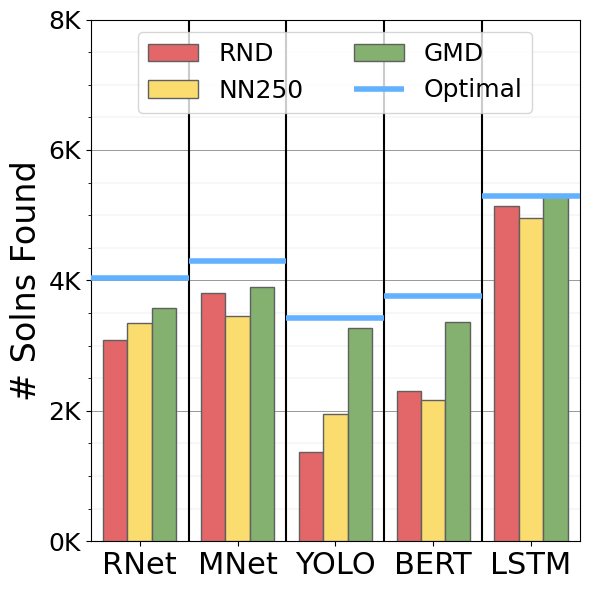

In [ ]:
# make a bar plot with 5 bars with the number of solutions found by each algorithm in the above order

fig, ax = plt.subplots(figsize=(6, 6))
barWidth = 0.5
bars1 = [soln_resnet[0], soln_resnet[1], soln_resnet[2]]
bars2 = [soln_mobnet[0], soln_mobnet[1], soln_mobnet[2]]
bars3 = [soln_yolo[0], soln_yolo[1], soln_yolo[2]]
bars4 = [soln_bert[0], soln_bert[1], soln_bert[2]]
bars5 = [soln_lstm[0], soln_lstm[1], soln_lstm[2]]

r1 = [0.5, 1, 1.5]
r2 = [2.5, 3, 3.5]
r3 = [4.5, 5, 5.5]
r4 = [6.5, 7, 7.5]
r5 = [8.5, 9, 9.5]


colors = ['#e36668', '#fadc6f', '#84b070']

ax.bar(r1, bars1, color=colors, width=barWidth, edgecolor='#606060', zorder=3, label=['RND', 'NN250', 'GMD'])
ax.bar(r2, bars2, color=colors, width=barWidth, edgecolor='#606060', zorder=3)
ax.bar(r3, bars3, color=colors, width=barWidth, edgecolor='#606060', zorder=3)
ax.bar(r4, bars4, color=colors, width=barWidth, edgecolor='#606060', zorder=3)
ax.bar(r5, bars5, color=colors, width=barWidth, edgecolor='#606060', zorder=3)


# ax.hlines(y=y1, xmin=ax.get_xlim()[0], xmax=x2, color='r', linestyle='-', label='Optimal', zorder=4)
# add a red horizontal line for the optimal solution
ax.hlines(y=soln_resnet[3], xmin=0, xmax=2, color='#61b1ff', linestyle='-', label='Optimal', zorder=4, linewidth=4)
# add verticle seperator line at x = 2
ax.axvline(x=2, color='black', linestyle='-', zorder=2)

ax.hlines(y=soln_mobnet[3], xmin=2, xmax=4, color='#61b1ff', linestyle='-', zorder=4, linewidth=4)
ax.axvline(x=4, color='black', linestyle='-', zorder=2)

ax.hlines(y=soln_yolo[3], xmin=4, xmax=6, color='#61b1ff', linestyle='-', zorder=4, linewidth=4)
ax.axvline(x=6, color='black', linestyle='-', zorder=2)

ax.hlines(y=soln_bert[3], xmin=6, xmax=8, color='#61b1ff', linestyle='-', zorder=4, linewidth=4)
ax.axvline(x=8, color='black', linestyle='-', zorder=2)

ax.hlines(y=soln_lstm[3], xmin=8, xmax=10, color='#61b1ff', linestyle='-', zorder=4, linewidth=4)

ax.set_xticks([1, 3, 5, 7, 9])
# set labels as model names
ax.set_xticklabels(['RNet', 'MNet',  'YOLO', 'BERT', 'LSTM'], fontsize=22)
# ax.set_xticklabels(['RND', 'NN250',  'GMD'], rotation=45, fontsize=18)
ax.set_ylim(0, 8000)
ax.set_xlim(0,10)
# Increase the font size of the y-axis tick labels
ax.tick_params(axis='y', labelsize=20)
# set yticks
ax.set_yticks([0, 2000, 4000, 6000, 8000])
# set y tick label names
ax.set_yticklabels(['0K', '2K', '4K', '6K', '8K'], fontsize=18)
# Add gridlines
# Enable minor ticks
ax.minorticks_on()

# Add major gridlines
ax.yaxis.grid(which='major', linestyle='-', linewidth='0.5', color='#707070', alpha=1)

# Add minor gridlines
ax.yaxis.grid(which='minor', linestyle='-', linewidth='0.25', color='lightgray')

# Remove minor ticks on the x-axis
ax.set_xticks([], minor=True)

# Add label on left y-axis
ax.set_ylabel('# Solns Found', fontsize=24)

# Increase legend font size
ax.legend(fontsize=18, ncols=2, loc='upper center')
plt.tight_layout()
plt.savefig('numSols_allModels.pdf', format='pdf',dpi=300, bbox_inches='tight')
plt.show()